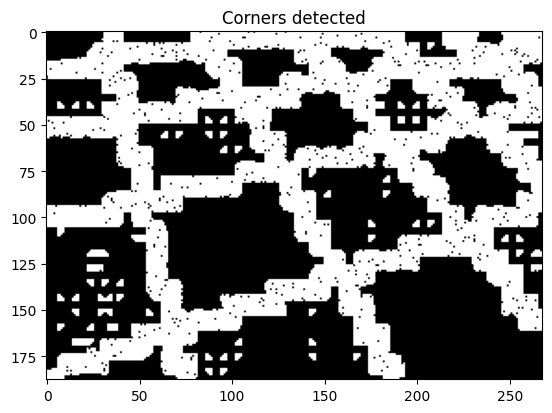

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

def harris_corner_detector(image, threshold=0.01, window_size=3, k=0.04):
    # Compute image gradients
    dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    dy = dx.T
    Ix = convolve(image, dx)
    Iy = convolve(image, dy)

    # Compute components of the Harris matrix
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix*Iy

    # Compute sums of the products of derivatives
    Sxx = convolve(Ixx, np.ones((window_size, window_size)))
    Syy = convolve(Iyy, np.ones((window_size, window_size)))
    Sxy = convolve(Ixy, np.ones((window_size, window_size)))

    # Compute determinant and trace of the Harris matrix
    det = Sxx * Syy - Sxy**2
    trace = Sxx + Syy

    # Compute Harris response
    harris_response = det - k * (trace**2)

    # Threshold the corner response
    corners = np.zeros_like(image)
    corners[harris_response > threshold * harris_response.max()] = 255
    return corners

# Load the image
image = cv2.imread('harris_image.jpeg', cv2.IMREAD_GRAYSCALE)

corners = harris_corner_detector(image)

# Display the corners
plt.imshow(corners, cmap='gray')
plt.title('Corners detected')
plt.show()
